In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./HeartFailurePredictionDataset.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 3a. Feature Engineering

## One Hot Encoding

In [3]:
object_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        object_columns.append(col)

df = pd.get_dummies(df, columns=object_columns)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    bool   
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non

## Splitting Data

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3b. Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        77
           1       0.87      0.75      0.80       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



# 3c. Bagging with 100 Decision Trees

In [8]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
bc.fit(X_train, y_train)

bc_pred = bc.predict(X_test)

In [9]:
print(classification_report(y_test, bc_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        77
           1       0.94      0.87      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.89      0.89       184



# 3d. 
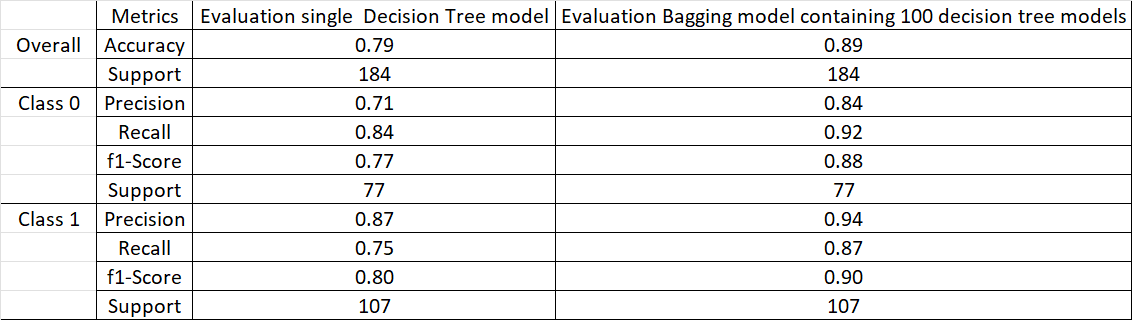

# 3e.

Best Model: 

The Bagging model with 100 Decision Trees performs best, achieving higher accuracy, precision, recall, and F1-scores across both classes. This improvement results from the ensemble approach, which reduces individual tree errors and leads to a more stable and accurate model. The diversity among the 100 trees in Bagging helps it generalize better, handling both classes effectively and providing a significant boost in model reliability.

Worst Model: 

The single Decision Tree model is the weaker performer. Decision Trees, on their own, are prone to high variance and overfitting, especially on complex datasets. This model comparatively lower precision, recall, and F1-scores indicate it struggles with correctly classifying both classes, especially with balancing precision and recall for each.

In summary, the Bagging model ensemble approach offers substantial benefits over a single Decision Tree by improving predictive accuracy and robustness across classes, making it the superior choice in this comparison.